# Prueba Técnica Mercado Libre - Jose Currea

In [256]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [257]:
#API Categorias
import requests
cats = requests.get("https://api.mercadolibre.com/sites/MLA/categories")
cats_json = cats.json()
df_cats = pd.DataFrame.from_dict(cats_json)
df_cats.head(50)

,id,name
0,MLA5725,Accesorios para Vehículos
1,MLA1512,Agro
2,MLA1403,Alimentos y Bebidas
3,MLA1071,Animales y Mascotas
4,MLA1367,Antigüedades y Colecciones
5,MLA1368,"Arte, Librería y Mercería"
6,MLA1743,"Autos, Motos y Otros"
7,MLA1384,Bebés
8,MLA1246,Belleza y Cuidado Personal
9,MLA1039,Cámaras y Accesorios


In [258]:
# Api items
cat_id = 'MCO1276'
total_results = 1000
offs = 10

# DF para los items
df_items = pd.DataFrame()

# Iterando sobre los offsets
for offset in range(0, total_results, offs):
    url = f'https://api.mercadolibre.com/sites/MCO/search?category={cat_id}&offset={offset}'
    request = requests.get(url)
    items = request.json()
    df_items = pd.concat([df_items, pd.DataFrame(items['results'])], ignore_index=True)


In [259]:
df_items.head()

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,official_store_name,differential_pricing,variation_filters,variations_data
0,MCO1930523048,Pastillas Shimano B05s Originales 50% Más Resi...,new,831848-MLU71764372657_092023,MCO27114730,gold_special,https://www.mercadolibre.com.co/pastillas-shim...,buy_it_now,MCO,MCO371951,MCO-BICYCLE_DISC_BRAKE_PADS,http://http2.mlstatic.com/D_831848-MLU71764372...,COP,1,28160,32000.0,None,1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': Fals...",2043-09-20T04:00:00.000Z,"{'id': 240348085, 'nickname': 'BIKETECH CARTAGO'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 782.22, 'rate': 0, ...",None,True,None,[],JBAL87326,NaN,NaN,NaN,NaN
1,MCO1397105709,Colchoneta Magnux Yoga Pilates Mat Tapete Ejer...,new,949466-MLU74643617016_022024,MCO34102507,gold_special,https://www.mercadolibre.com.co/colchoneta-mag...,buy_it_now,MCO,MCO441677,MCO-EXERCISE_AND_YOGA_MATS,http://http2.mlstatic.com/D_949466-MLU74643617...,COP,2,37900,59900.0,None,500,2023.0,True,True,"{'store_pick_up': False, 'free_shipping': Fals...",2044-02-23T04:00:00.000Z,"{'id': 212962423, 'nickname': 'WWW.BIG44SALE.C...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 1052.78, 'rate': 0,...",None,True,None,[],TFIV26266,MAGNUX,NaN,NaN,NaN
2,MCO1333729713,Linterna Tactica Recargable De Larga Distancia...,new,710625-MLU73883611211_012024,MCO23772741,gold_special,https://www.mercadolibre.com.co/linterna-tacti...,buy_it_now,MCO,MCO47781,MCO-FLASHLIGHTS,http://http2.mlstatic.com/D_710625-MLU73883611...,COP,3,8344,NaN,None,50,NaN,True,True,"{'store_pick_up': False, 'free_shipping': Fals...",2043-08-27T04:00:00.000Z,"{'id': 443923880, 'nickname': 'ELECTRONICOSJAP...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",None,None,True,None,[],VRWO80836,NaN,NaN,NaN,NaN
3,MCO1358179195,Ciclocomputador Igpsport Bsc100s + Soporte M80,new,731990-MLU73935064247_012024,MCO27386095,gold_special,https://www.mercadolibre.com.co/ciclocomputado...,buy_it_now,MCO,MCO158237,MCO-CYCLING_COMPUTERS,http://http2.mlstatic.com/D_731990-MLU73935064...,COP,4,160000,NaN,None,1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2043-11-04T04:00:00.000Z,"{'id': 832162815, 'nickname': 'CYCLING STORE2'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 4444.44, 'rate': 0,...",None,True,None,[],None,NaN,NaN,NaN,NaN
4,MCO2038274200,Colchón Inflable Doble Best Way Más 2 Almohada...,new,734619-MLU72651627087_112023,MCO23072789,gold_special,https://www.mercadolibre.com.co/colchon-inflab...,buy_it_now,MCO,MCO47745,MCO-AIR_MATTRESSES,http://http2.mlstatic.com/D_734619-MLU72651627...,COP,5,92400,120000.0,None,1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-02-11T03:50:17.805Z,"{'id': 185800844, 'nickname': 'MASTECH 23'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 2566.67, 'rate': 0,...",None,True,None,[],IKDA23080,NaN,NaN,NaN,NaN


In [260]:
#Modificacion columnas
df_items['item_id']=df_items['id']
df_items = df_items.drop('id', axis=1)

In [261]:
df_items.columns

Index(['title', 'condition', 'thumbnail_id', 'catalog_product_id',
       'listing_type_id', 'permalink', 'buying_mode', 'site_id', 'category_id',
       'domain_id', 'thumbnail', 'currency_id', 'order_backend', 'price',
       'original_price', 'sale_price', 'available_quantity',
       'official_store_id', 'use_thumbnail_id', 'accepts_mercadopago',
       'shipping', 'stop_time', 'seller', 'attributes', 'installments',
       'winner_item_id', 'catalog_listing', 'discounts', 'promotions',
       'inventory_id', 'official_store_name', 'differential_pricing',
       'variation_filters', 'variations_data', 'item_id'],
      dtype='object')

# Creacion de columnas

In [262]:
#Informacion de Sellers
seller_info = json_normalize(df_items['seller'])
df_items = pd.concat([df_items, seller_info], axis=1)
df_items = df_items.drop('seller', axis=1)
df_items = df_items.rename(columns={'id': 'seller_id', 'nickname':'seller_nickname'})
#Informacion shipping
shipping_info = json_normalize(df_items['shipping'])
df_items = pd.concat([df_items, shipping_info], axis=1)
df_items = df_items.drop('shipping', axis=1)
#Informacion installments
installments = json_normalize(df_items['installments'])
df_items = pd.concat([df_items, installments], axis=1)
df_items = df_items.drop('installments', axis=1)

In [263]:
df_items.head()

,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,stop_time,attributes,winner_item_id,catalog_listing,discounts,promotions,inventory_id,official_store_name,differential_pricing,variation_filters,variations_data,item_id,seller_id,seller_nickname,store_pick_up,free_shipping,logistic_type,mode,tags,benefits,promise,quantity,amount,rate,currency_id
0,Pastillas Shimano B05s Originales 50% Más Resi...,new,831848-MLU71764372657_092023,MCO27114730,gold_special,https://www.mercadolibre.com.co/pastillas-shim...,buy_it_now,MCO,MCO371951,MCO-BICYCLE_DISC_BRAKE_PADS,http://http2.mlstatic.com/D_831848-MLU71764372...,COP,1,28160,32000.0,None,1,NaN,True,True,2043-09-20T04:00:00.000Z,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",None,True,None,[],JBAL87326,NaN,NaN,NaN,NaN,MCO1930523048,240348085,BIKETECH CARTAGO,False,False,cross_docking,me2,[fbm_in_process],None,None,36.0,782.22,0.0,COP
1,Colchoneta Magnux Yoga Pilates Mat Tapete Ejer...,new,949466-MLU74643617016_022024,MCO34102507,gold_special,https://www.mercadolibre.com.co/colchoneta-mag...,buy_it_now,MCO,MCO441677,MCO-EXERCISE_AND_YOGA_MATS,http://http2.mlstatic.com/D_949466-MLU74643617...,COP,2,37900,59900.0,None,500,2023.0,True,True,2044-02-23T04:00:00.000Z,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",None,True,None,[],TFIV26266,MAGNUX,NaN,NaN,NaN,MCO1397105709,212962423,WWW.BIG44SALE.COM,False,False,fulfillment,me2,[fulfillment],None,None,36.0,1052.78,0.0,COP
2,Linterna Tactica Recargable De Larga Distancia...,new,710625-MLU73883611211_012024,MCO23772741,gold_special,https://www.mercadolibre.com.co/linterna-tacti...,buy_it_now,MCO,MCO47781,MCO-FLASHLIGHTS,http://http2.mlstatic.com/D_710625-MLU73883611...,COP,3,8344,NaN,None,50,NaN,True,True,2043-08-27T04:00:00.000Z,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",None,True,None,[],VRWO80836,NaN,NaN,NaN,NaN,MCO1333729713,443923880,ELECTRONICOSJAPONP,False,False,drop_off,me2,[],None,None,NaN,NaN,NaN,NaN
3,Ciclocomputador Igpsport Bsc100s + Soporte M80,new,731990-MLU73935064247_012024,MCO27386095,gold_special,https://www.mercadolibre.com.co/ciclocomputado...,buy_it_now,MCO,MCO158237,MCO-CYCLING_COMPUTERS,http://http2.mlstatic.com/D_731990-MLU73935064...,COP,4,160000,NaN,None,1,NaN,True,True,2043-11-04T04:00:00.000Z,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",None,True,None,[],None,NaN,NaN,NaN,NaN,MCO1358179195,832162815,CYCLING STORE2,False,True,xd_drop_off,me2,"[self_service_out, mandatory_free_shipping]",None,None,36.0,4444.44,0.0,COP
4,Colchón Inflable Doble Best Way Más 2 Almohada...,new,734619-MLU72651627087_112023,MCO23072789,gold_special,https://www.mercadolibre.com.co/colchon-inflab...,buy_it_now,MCO,MCO47745,MCO-AIR_MATTRESSES,http://http2.mlstatic.com/D_734619-MLU72651627...,COP,5,92400,120000.0,None,1,NaN,True,True,2044-02-11T03:50:17.805Z,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",None,True,None,[],IKDA23080,NaN,NaN,NaN,NaN,MCO2038274200,185800844,MASTECH 23,False,True,xd_drop_off,me2,[mandatory_free_shipping],None,None,36.0,2566.67,0.0,COP


In [264]:
df_items.columns

Index(['title', 'condition', 'thumbnail_id', 'catalog_product_id',
       'listing_type_id', 'permalink', 'buying_mode', 'site_id', 'category_id',
       'domain_id', 'thumbnail', 'currency_id', 'order_backend', 'price',
       'original_price', 'sale_price', 'available_quantity',
       'official_store_id', 'use_thumbnail_id', 'accepts_mercadopago',
       'stop_time', 'attributes', 'winner_item_id', 'catalog_listing',
       'discounts', 'promotions', 'inventory_id', 'official_store_name',
       'differential_pricing', 'variation_filters', 'variations_data',
       'item_id', 'seller_id', 'seller_nickname', 'store_pick_up',
       'free_shipping', 'logistic_type', 'mode', 'tags', 'benefits', 'promise',
       'quantity', 'amount', 'rate', 'currency_id'],
      dtype='object')

# Exploracion Datos

In [265]:
total_sales = df_items.groupby(['seller_id', 'seller_nickname'])['quantity'].sum().reset_index()
# Ordena y visualiza los sellers con las mayores ventas totales
top_sellers = total_sales.sort_values(by='quantity', ascending=False)
top_sellers.head()

,seller_id,seller_nickname,quantity
134,240348085,BIKETECH CARTAGO,8508.0
78,160820235,BUILDER CO,6732.0
75,155147039,WGDISTRIBUCIONDEREPUESTOS,4536.0
93,178840084,KORINTIO.COM,4464.0
25,53544979,VOY ENBICI,4464.0


In [266]:
#PCantidad de productos por seller
distinct_products = df_items.groupby(['seller_id', 'seller_nickname'])['item_id'].nunique().reset_index()
# Sellers que ofrecen mas productos
top_offers_by_sellers = distinct_products.sort_values(by='item_id', ascending=False)
top_offers_by_sellers = top_offers_by_sellers.rename(columns={'item_id': 'quantity_distinct_products'})
top_offers_by_sellers.head()

,seller_id,seller_nickname,quantity_distinct_products
134,240348085,BIKETECH CARTAGO,54
78,160820235,BUILDER CO,41
93,178840084,KORINTIO.COM,32
25,53544979,VOY ENBICI,29
75,155147039,WGDISTRIBUCIONDEREPUESTOS,28


In [267]:
df_items['accepts_mp'] = df_items['accepts_mercadopago'].apply(lambda x: 1 if x else 0)
#df_items.head()
sellers_accept_mp = df_items.groupby(['seller_id', 'seller_nickname'])['accepts_mp'].sum().reset_index()
#Sellers que en su mayoria aceptan MP
top_sellers_mp = sellers_accept_mp.sort_values(by='accepts_mp', ascending=False)
top_sellers_mp.head()

,seller_id,seller_nickname,accepts_mp
134,240348085,BIKETECH CARTAGO,253
78,160820235,BUILDER CO,187
93,178840084,KORINTIO.COM,154
25,53544979,VOY ENBICI,144
75,155147039,WGDISTRIBUCIONDEREPUESTOS,136


In [268]:
df_items['free_ship'] = df_items['free_shipping'].apply(lambda x: 1 if x else 0)
#df_items.head()
seller_free_ship = df_items.groupby(['seller_id', 'seller_nickname'])['free_ship'].sum().reset_index()
#Organiza por los que hacen free shipping, entre menos productos con free shipping menos apetecible
top_sellers_fs = seller_free_ship.sort_values(by='free_ship', ascending=False)
top_sellers_fs.head()

,seller_id,seller_nickname,free_ship
134,240348085,BIKETECH CARTAGO,122
59,118807519,HOMESALE.COM.CO,101
122,212962423,WWW.BIG44SALE.COM,76
178,369346540,WWW.HOMESALE.COM.CO,73
140,247730346,AKTIVABRANDS COLOMBIA,70


In [269]:
df_items['cond'] = df_items['condition'].apply(lambda x: 1 if x else 0)
#df_items.head()
new_items = df_items.groupby(['seller_id', 'seller_nickname'])['cond'].sum().reset_index()
#Organizar por los que t
quant_new_items = new_items.sort_values(by='cond', ascending=False)
quant_new_items.head()

,seller_id,seller_nickname,cond
134,240348085,BIKETECH CARTAGO,253
78,160820235,BUILDER CO,187
93,178840084,KORINTIO.COM,154
25,53544979,VOY ENBICI,144
75,155147039,WGDISTRIBUCIONDEREPUESTOS,136


# Creacion df a nivel de sellers

In [270]:
df_sellers = df_items.groupby(['seller_id', 'seller_nickname']).agg({
    'quantity': 'sum',
    'item_id': 'count',
    'discounts': 'any',
    'accepts_mercadopago': 'any',
    'store_pick_up': 'any',
    'inventory_id': 'nunique',
    'available_quantity':'sum',
    'free_shipping':'any'
}).reset_index()
df_sellers = df_sellers.rename(columns={'quantity': 'sold_quantity', 'item_id': 'quantity_products_listed', 'inventory_id': 'distinct_products'})


In [271]:
df_sellers.head()

,seller_id,seller_nickname,sold_quantity,quantity_products_listed,discounts,accepts_mercadopago,store_pick_up,distinct_products,available_quantity,free_shipping
0,7924454,DISTRIBUCIONES 55,180.0,5,False,True,False,0,5,True
1,9078481,ROCAYALTURA CO,240.0,10,False,True,False,2,10,True
2,12737083,CHANA13,180.0,5,False,True,False,1,5,False
3,17396386,PITTSMAN,432.0,12,False,True,False,0,28500,True
4,17578401,SPORTMARKETBM,180.0,5,False,True,False,0,5,True


In [272]:
#Join con variables generadas en la exploracion
df1 = pd.merge(df_sellers, quant_new_items, on=['seller_id', 'seller_nickname'], how='left')
df1 = df1.rename(columns={'cond': 'quantity_new_items'})
final_seller_df=pd.merge(df1, top_offers_by_sellers, on=['seller_id', 'seller_nickname'], how='left')

In [273]:
final_seller_df.head()

,seller_id,seller_nickname,sold_quantity,quantity_products_listed,discounts,accepts_mercadopago,store_pick_up,distinct_products,available_quantity,free_shipping,quantity_new_items,quantity_distinct_products
0,7924454,DISTRIBUCIONES 55,180.0,5,False,True,False,0,5,True,5,1
1,9078481,ROCAYALTURA CO,240.0,10,False,True,False,2,10,True,10,2
2,12737083,CHANA13,180.0,5,False,True,False,1,5,False,5,1
3,17396386,PITTSMAN,432.0,12,False,True,False,0,28500,True,12,3
4,17578401,SPORTMARKETBM,180.0,5,False,True,False,0,5,True,5,1


In [274]:
final_seller_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   seller_id                   346 non-null    int64  
 1   seller_nickname             346 non-null    object 
 2   sold_quantity               346 non-null    float64
 3   quantity_products_listed    346 non-null    int64  
 4   discounts                   346 non-null    bool   
 5   accepts_mercadopago         346 non-null    bool   
 6   store_pick_up               346 non-null    bool   
 7   distinct_products           346 non-null    int64  
 8   available_quantity          346 non-null    int64  
 9   free_shipping               346 non-null    bool   
 10  quantity_new_items          346 non-null    int64  
 11  quantity_distinct_products  346 non-null    int64  
dtypes: bool(4), float64(1), int64(6), object(1)
memory usage: 25.7+ KB


In [275]:
final_seller_df.describe()

,seller_id,sold_quantity,quantity_products_listed,distinct_products,available_quantity,quantity_new_items,quantity_distinct_products
count,3.460000e+02,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,4.436364e+08,419.028902,14.450867,1.040462,2550.000000,14.450867,3.005780
std,3.651642e+08,872.780441,25.571138,3.315940,16092.434743,25.571138,5.392961
min,7.924454e+06,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.738547e+08,60.000000,5.000000,0.000000,5.000000,5.000000,1.000000
50%,3.495478e+08,180.000000,5.000000,0.000000,25.000000,5.000000,1.000000
75%,6.113071e+08,360.000000,11.500000,1.000000,753.750000,11.500000,3.000000
max,1.556623e+09,8508.000000,253.000000,34.000000,250000.000000,253.000000,54.000000


In [277]:
final_seller_df['accepts_mercado_pago'] = final_seller_df['accepts_mercadopago'].astype(bool)
final_seller_df['store_pick_up'] = final_seller_df['store_pick_up'].astype(bool)
#Se genera una clasificacion manual con base a la exploracion inicial con el fin de probar un modelo supervisado
#Para el modelo no supervisado se hara drop de la columna
final_seller_df['good_profile'] =  (final_seller_df['accepts_mercadopago'] == True) & (final_seller_df['store_pick_up'] == False) & (final_seller_df['sold_quantity'] >= 400) & (final_seller_df['quantity_new_items'] >= 14)&(final_seller_df['free_shipping'] == True) &(final_seller_df['quantity_distinct_products']>=3)

# Implementacion Modelos Supervisados

## RFC (Random Forest Classifier)

In [278]:
X = final_seller_df.drop(['seller_id','seller_nickname','good_profile'], axis=1)
y = final_seller_df['good_profile']

In [279]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar el clasificador
rfc = RandomForestClassifier(random_state=42)
# Entrenar el modelo
rfc.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = rfc.predict(X_test)

In [280]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [281]:
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.9857

Confusion Matrix:
 [[59  1]
 [ 0 10]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99        60
        True       0.91      1.00      0.95        10

    accuracy                           0.99        70
   macro avg       0.95      0.99      0.97        70
weighted avg       0.99      0.99      0.99        70



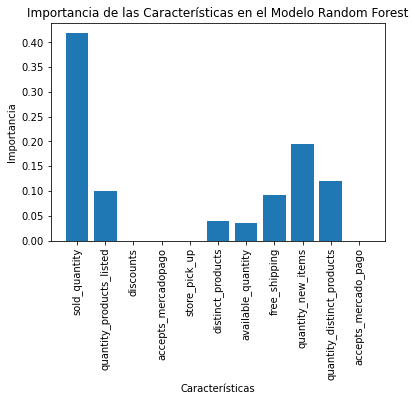

In [282]:
# Obtener la importancia de las características del modelo
feature_importances = rfc.feature_importances_
# Crear un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Ordenar el DataFrame por importancia de características
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Crear un gráfico de barras para visualizar la importancia de las características
plt.bar(X.columns, feature_importances)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xticks(rotation=90)
plt.show()

## KNN

In [283]:
# Inicializar el clasificador KNeighborsClassifier
knn = KNeighborsClassifier()
# Entrenar el modelo
knn.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

In [284]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [285]:
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.8571

Confusion Matrix:
 [[53  7]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.88      0.91        60
        True       0.50      0.70      0.58        10

    accuracy                           0.86        70
   macro avg       0.72      0.79      0.75        70
weighted avg       0.88      0.86      0.87        70



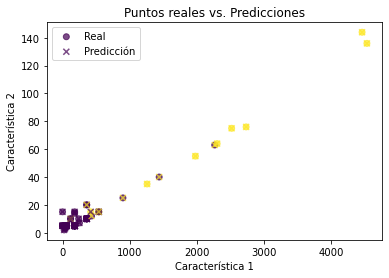

In [286]:
# Visualizar los puntos en un gráfico de dispersión (scatter plot)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', label='Real', alpha=0.7)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicción', alpha=0.7)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Puntos reales vs. Predicciones')
plt.show()

# Implementacion Modelos No supervisados

In [287]:
final_seller_df_v2 = final_seller_df
# Separar las características (X)
X = final_seller_df.drop(['seller_id', 'seller_nickname', 'good_profile'], axis=1)
# Estandarizar las características para que todas tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [288]:
# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
# Ajustar el modelo a los datos
kmeans.fit(X_scaled)
# Obtener las etiquetas de cluster asignadas a cada seller
cluster_labels = kmeans.labels_

In [289]:
# Agregar las etiquetas de cluster al DataFrame original
final_seller_df_v2['cluster_label'] = cluster_labels
# Visualizar la distribución de los sellers en los clusters
print(final_seller_df_v2.groupby('cluster_label')['good_profile'].value_counts())

cluster_label  good_profile
0              False           291
               True             44
1              True             11
Name: good_profile, dtype: int64


In [290]:
#Ajuste de etiquetas
final_seller_df_v2['predicted_good_profile'] = final_seller_df_v2['cluster_label'].map({0: True, 1: False})

In [291]:
# Evaluar la precisión de las predicciones
accuracy = accuracy_score(final_seller_df_v2['good_profile'], final_seller_df_v2['predicted_good_profile'])
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.1272


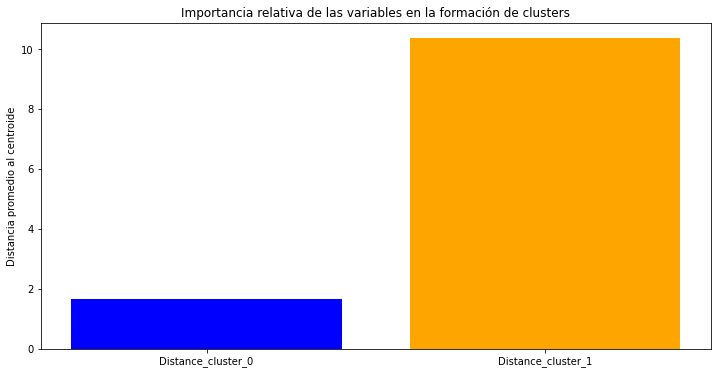

In [292]:
# Obtener las distancias de cada punto al centroide de su cluster
distances = kmeans.transform(X_scaled)
# Crear un DataFrame con las distancias y nombres de las variables
distances_df = pd.DataFrame(distances, columns=[f'Distance_cluster_{i}' for i in range(2)])
# Visualizar las distancias para cada variable
plt.figure(figsize=(12, 6))
plt.bar(distances_df.columns, distances_df.mean(), color=['blue', 'orange'])
plt.title('Importancia relativa de las variables en la formación de clusters')
plt.ylabel('Distancia promedio al centroide')
plt.show()